<a href="https://colab.research.google.com/github/aleksficek/Face-Mask-Detector/blob/main/maskyolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd gdrive
%cd My\ Drive
%cd darknet
%cd ultra

/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/darknet
/content/gdrive/My Drive/darknet/ultra


In [4]:
### NEED FOR INFERENCE
import time
import glob
import torch
import os
import matplotlib.pyplot as plt

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.7.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [5]:
### NEED FOR INFERENCE
# clone ultralytics yolo repo probably from commnd line
# git clone https://github.com/ultralytics/yolov3 

# enter directory which contains the model "/yolov3"
# cd yolov3

In [6]:
# !git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3

/content/gdrive/My Drive/darknet/ultra/yolov3


In [7]:
# Detect on coco dataset
# !python3 detect.py
# Image(filename='output/zidane.jpg', width=600)

# Train 1 epoch yolo3-spp weights
# !python3 train.py --data /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.data --img-size 320 --epochs 1 --batch-size 16 --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-spp-ultralytics.pt

# Detect with "best" weights
# !python3 detect.py --names /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.names --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/best.pt --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg  --source /content/gdrive/My\ Drive/darknet/dataset/yolo/images/test --conf-thres 0.3 --iou-thres 0.6

# Detect specific image with "best" weights
# from PIL import Image
# Image.open('/content/gdrive/My Drive/darknet/ultra/yolov3/output/jlin.jpg')

In [10]:
!python3 train.py --data /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.data --img-size 320 --epochs 130 --batch-size 32 --custom-freeze --backbone-end 41 \
  --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-transfer.cfg --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/stock-e130-f41.pt
# /content/gdrive/My\ Drive/darknet/dataset/yolo/best.pt
# /weights/last.pt

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Your branch is behind 'origin/master' by 2 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Namespace(adam=False, backbone_end=41, batch_size=32, bucket='', cache_images=False, cfg='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-mask-transfer.cfg', custom_freeze=True, data='/content/gdrive/My Drive/darknet/dataset/yolo/obj.data', device='', epochs=130, evolve=False, freeze_layers=False, img_size=[320], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/My Drive/darknet/dataset/yolo/stock-e130-f41.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-11-08 20:26:54.500582: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library l

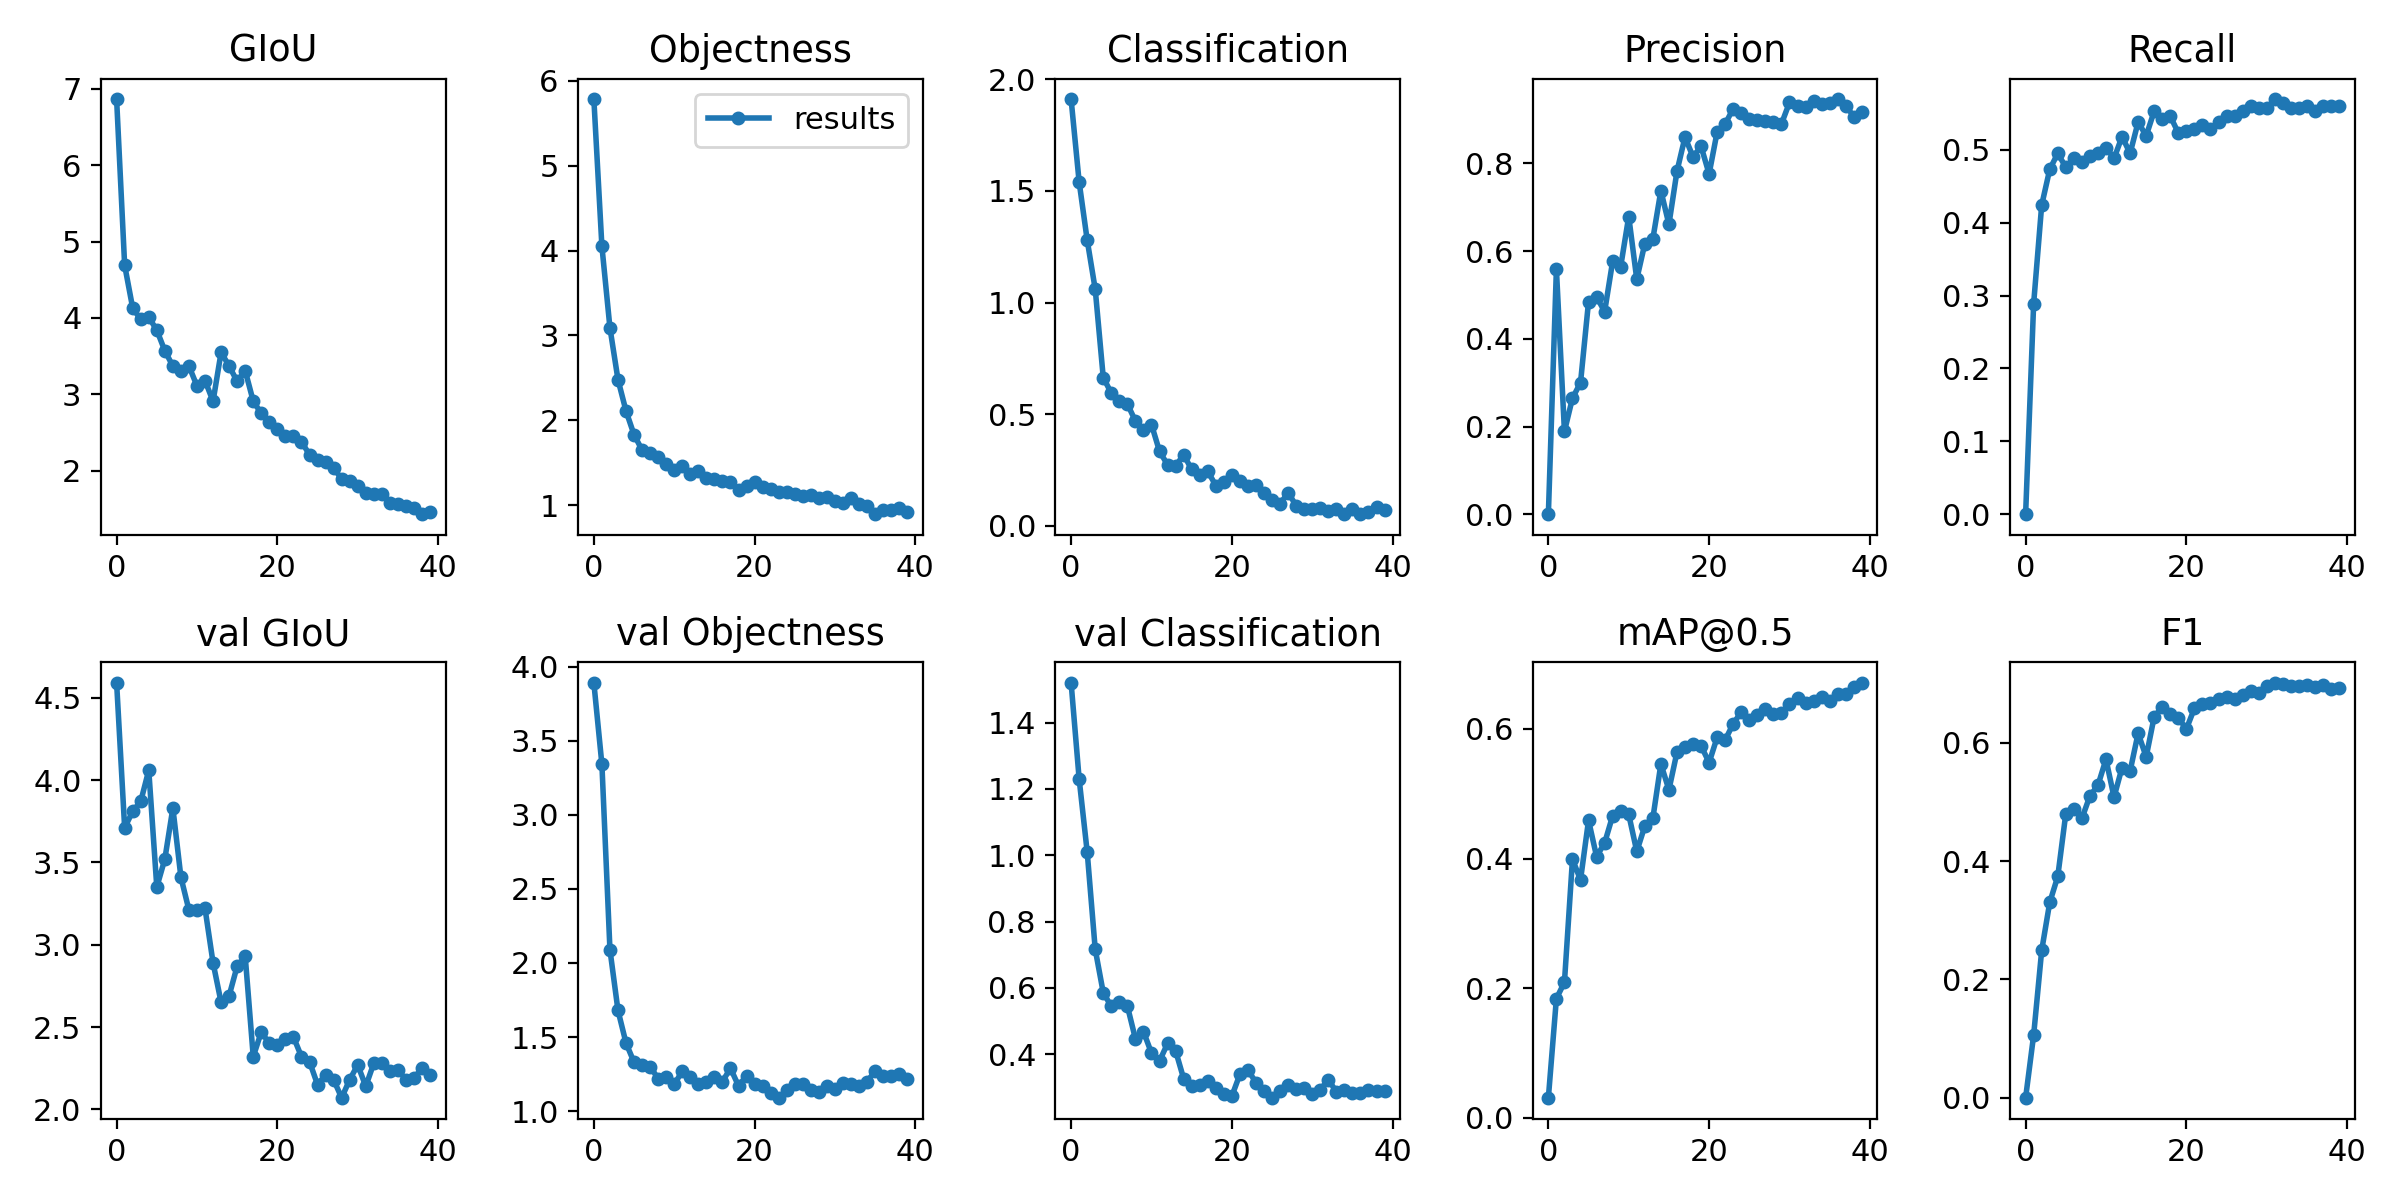

In [19]:
# Output results
# !python3 -c "from utils import utils; utils.plot_results()"
Image(filename='results.png', width=800)

In [ ]:
!python3 test.py --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-spp-ultralytics.pt --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-transfer.cfg \
  --conf-thres 0.3 --iou-thres 0.6 --augment --data /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.data --img-size 320

Namespace(augment=True, batch_size=16, cfg='/content/gdrive/My Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg', conf_thres=0.3, data='/content/gdrive/My Drive/darknet/dataset/yolo/obj.data', device='', img_size=320, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='/content/gdrive/My Drive/darknet/dataset/yolo/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25787e+07 parameters, 6.25787e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.25519e+07 parameters, 6.25519e+07 gradients
Caching labels /content/gdrive/My Drive/darknet/dataset/yolo/test.txt (84 found, 0 missing, 0 empty, 0 duplicate, for 84 images): 100% 84/84 [00:06<00:00, 12.19it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1:   0% 0/6 [00:00<?, ?it/s]/content/gdrive/My Drive/darknet/ultra/yolov3/utils/utils.py:512: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider 

In [ ]:
!python3 -c "from utils.utils import *; create_backbone(f='weights/last.pt')"

In [ ]:
### NEED THIS FOR INFERENCE
!python3 detect.py --names /content/gdrive/My\ Drive/darknet/dataset/yolo/obj.names --weights /content/gdrive/My\ Drive/darknet/dataset/yolo/best.pt --cfg /content/gdrive/My\ Drive/darknet/dataset/yolo/yolov3-mask-spp.cfg  --source /content/gdrive/My\ Drive/darknet/dataset/yolo/images/test --conf-thres 0.3 --iou-thres 0.6


In [ ]:
### NEED THIS FOR INFERENCE
from PIL import Image
Image.open('/content/gdrive/My Drive/darknet/ultra/yolov3/output/jlin.jpg')